In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
from tqdm import tqdm
from random import shuffle

import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("..//..")
import config

In [2]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [18]:
def get_data_from_results_file(filepath):
       
    with open(filepath, "r") as file:
        run_dict = {}
        rt = file.readlines()
        
        def get_num_from_line(line):
            return rt[line].split(":")[1].strip()
        
        weeks = int(get_num_from_line(1))
        f1 = float(get_num_from_line(8))
        f1_3 = float(get_num_from_line(17))
        f1_5 = float(get_num_from_line(25))
        f1_7 = float(get_num_from_line(33))
        f1_9 = float(get_num_from_line(41))
        f1_11 = float(get_num_from_line(49))
        
        tn = float(get_num_from_line(4))
        fp = float(get_num_from_line(5))
        fn = float(get_num_from_line(6))
        tp = float(get_num_from_line(7))
        
        tn_3 = float(get_num_from_line(13))
        fp_3 = float(get_num_from_line(14))
        fn_3 = float(get_num_from_line(15))
        tp_3 = float(get_num_from_line(16))
        
        tn_5 = float(get_num_from_line(21))
        fp_5 = float(get_num_from_line(22))
        fn_5 = float(get_num_from_line(23))
        tp_5 = float(get_num_from_line(24))
        
        tn_7 = float(get_num_from_line(29))
        fp_7 = float(get_num_from_line(30))
        fn_7 = float(get_num_from_line(31))
        tp_7 = float(get_num_from_line(32))
        
        tn_9 = float(get_num_from_line(37))
        fp_9 = float(get_num_from_line(38))
        fn_9 = float(get_num_from_line(39))
        tp_9 = float(get_num_from_line(40))
        
        tn_11 = float(get_num_from_line(45))
        fp_11 = float(get_num_from_line(46))
        fn_11 = float(get_num_from_line(47))
        tp_11 = float(get_num_from_line(48))
        
    return [
        [weeks, 1, f1, tn, tp, fn, fp],
        [weeks, 3, f1_3, tn_3, tp_3, fn_3, fp_3],
        [weeks, 5, f1_5, tn_5, tp_5, fn_5, fp_5],
        [weeks, 7, f1_7, tn_7, tp_7, fn_7, fp_7],
        [weeks, 9, f1_9, tn_9, tp_9, fn_9, fp_9],
        [weeks, 11, f1_11, tn_11, tp_11, fn_11, fp_11],
    ]

In [46]:
# load runs from 16 sized model
runspath = os.path.join(config.RUNS_PATH, "16_16_16_16")
run_folders = os.listdir(runspath)
run_folders = [f for f in run_folders if not("SMALL MODEL" in f)]

runs_data = []
for folder in run_folders:
    filepath = os.path.join(runspath, folder, "results.txt")
    runs_data = runs_data + get_data_from_results_file(filepath)

In [47]:
cols = [
    'weeks', "pixel_size", "f1", "tn", "tp", "fn", "fp"
]
    # 'f1', 'f1_3', 'f1_5', 'f1_7', 'f1_9', 'f1_11', 
    # 'tn', 'tp', 'fn', 'fp', 
    # 'tn_3', 'tp_3', 'fn_3', 'fp_3', 
    # 'tn_5', 'tp_5', 'fn_5', 'fp_5', 
    # 'tn_7', 'tp_7', 'fn_7', 'fp_7', 
    # 'tn_9', 'tp_9', 'fn_9', 'fp_9', 
    # 'tn_11', 'tp_11', 'fn_11', 'fp_11'
# ]
runs_data = pd.DataFrame(runs_data, columns=cols)

In [49]:
# f1 by model
f1_compare = pd.pivot_table(runs_data, index="weeks", columns="pixel_size", values="f1", aggfunc="mean")
f1_compare

pixel_size,1,3,5,7,9,11
weeks,,,,,,
2,0.086730,0.136359,0.174064,0.206783,0.235710,0.261266
4,0.103123,0.179873,0.237395,0.281721,0.322075,0.354514
8,0.117343,0.228701,0.308710,0.369934,0.419705,0.460485
12,0.134015,0.268066,0.358911,0.428508,0.483335,0.527185
24,0.173522,0.348404,0.459075,0.535058,0.590580,0.634176


<Axes: xlabel='weeks'>

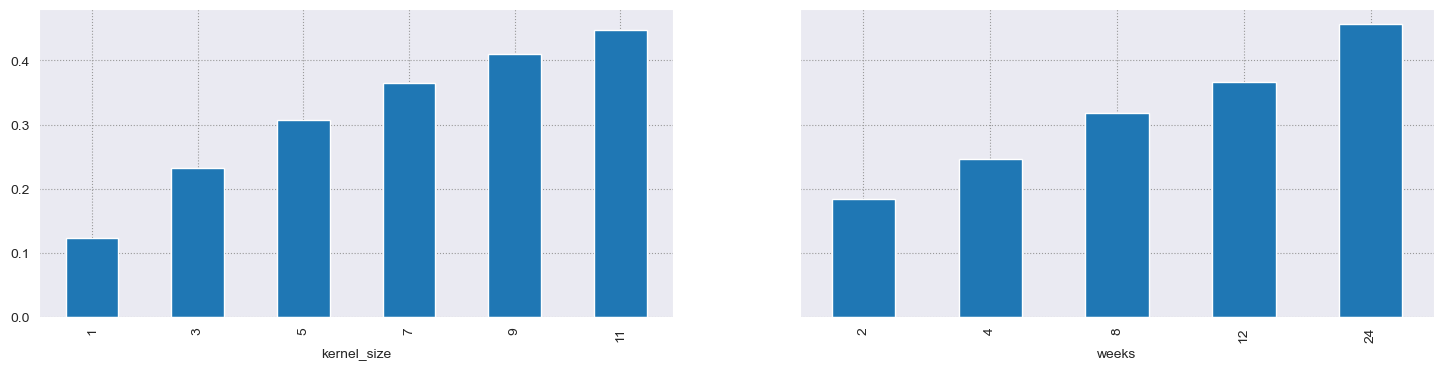

In [36]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(18, 4))
f1_compare.mean(axis=0).plot(kind="bar", ax=ax[0])
f1_compare.mean(axis=1).plot(kind="bar", ax=ax[1])

In [37]:
# precision by model
runs_data["prec"] = runs_data["tp"] / (runs_data["tp"] + runs_data["fp"])
prec_compare = pd.pivot_table(runs_data, index="weeks", columns="pixel_size", values="prec", aggfunc="mean")
prec_compare

kernel_size,1,3,5,7,9,11
weeks,,,,,,
2,0.076673,0.122831,0.149465,0.167868,0.195871,0.220963
4,0.103873,0.160493,0.203557,0.253718,0.273317,0.308940
8,0.095813,0.180891,0.246675,0.294360,0.347235,0.392330
12,0.092409,0.204244,0.281999,0.341107,0.401688,0.452776
24,0.119065,0.272054,0.385261,0.464386,0.539138,0.579792


<Axes: xlabel='weeks'>

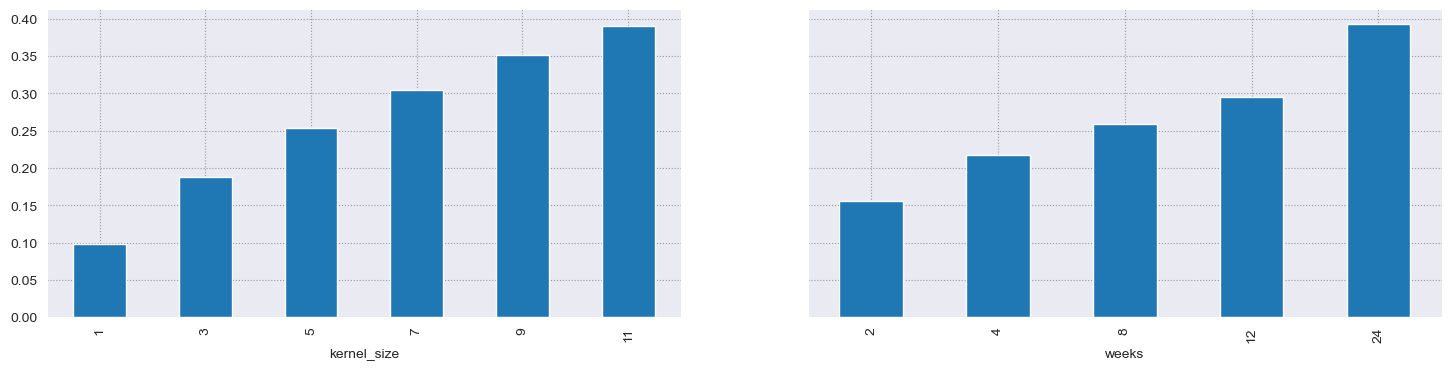

In [38]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(18, 4))
prec_compare.mean(axis=0).plot(kind="bar", ax=ax[0])
prec_compare.mean(axis=1).plot(kind="bar", ax=ax[1])

In [39]:
# recall by model
runs_data["rec"] = runs_data["tp"] / (runs_data["tp"] + runs_data["fn"])
rec_compare = pd.pivot_table(runs_data, index="weeks", columns="pixel_size", values="rec", aggfunc="mean")
rec_compare

kernel_size,1,3,5,7,9,11
weeks,,,,,,
2,0.099825,0.153234,0.208356,0.269185,0.295892,0.319553
4,0.102383,0.204575,0.284725,0.316671,0.392005,0.415861
8,0.151354,0.310860,0.412430,0.497719,0.530402,0.557296
12,0.243772,0.389901,0.493510,0.576126,0.606641,0.630860
24,0.319783,0.484329,0.567879,0.631101,0.652874,0.699819


<Axes: xlabel='weeks'>

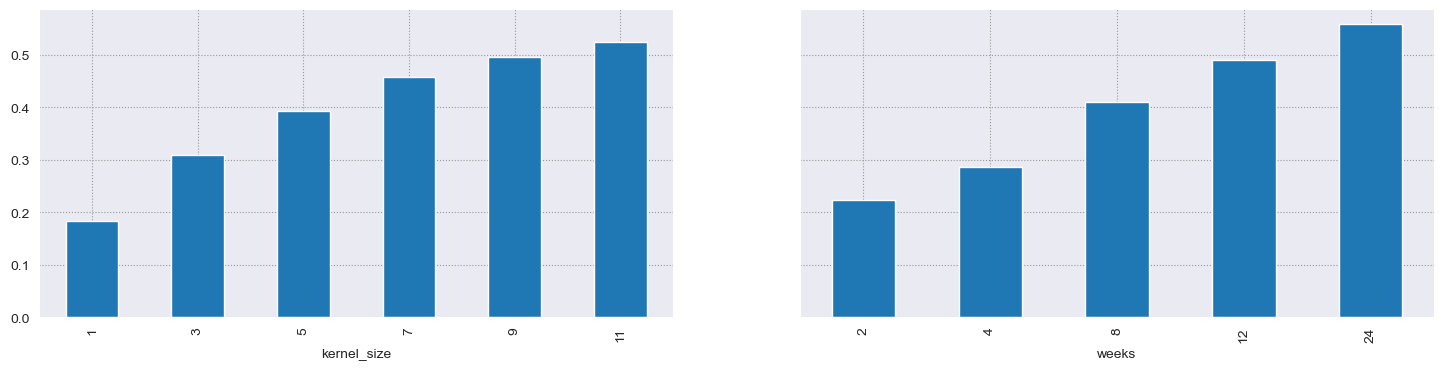

In [40]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(18, 4))
rec_compare.mean(axis=0).plot(kind="bar", ax=ax[0])
rec_compare.mean(axis=1).plot(kind="bar", ax=ax[1])